In [1]:
# Dependencies
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import plotly.graph_objects as go
import datetime as DT
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# MAKE SURE THAT THE DATA IS ORGANIZED BY MOST RECENT ON TOP.

data = pd.read_csv("data/race_data.csv")

positive_index = data.columns.get_loc("Positives")
death_index = data.columns.get_loc("Deaths")
negative_index = data.columns.get_loc("Negatives")
last_index = negative_index + (negative_index - death_index)

positive_index, death_index, negative_index, last_index

data_df = data.iloc[:, np.r_[1:last_index]]

data_df = data_df.iloc[:, :-1]
data_df

data_df.columns = data_df.iloc[1]
data_df = data_df.rename(columns = {data_df.columns[0]: "State"})
data_df = data_df.drop([0,1])
data_df = data_df.drop_duplicates(subset = "State", keep = "first")

data_df.head()

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.
2,AK,NaN,NaN,5/27 14:15,5/27 22:16,JDL,BL,412,264,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,NaN,NaN,5/27 0:00,5/27 22:29,JDL,RV,16032,6273,6730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,NaN,NaN,5/27 19:13,5/27 22:43,JDL,RV,6277,3012,2194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS,NaN,NaN,NaN,5/27 22:45,JDL,RV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AZ,NaN,NaN,5/27 0:00,5/27 22:53,JDL,RV,17262,3548,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
drop_columns = ["Update Time", "Source", "Last Check", "Checker", "DC"]

positive_df = data_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
positive_df = positive_df.iloc[:, :-1]
positive_df = positive_df.drop(drop_columns, axis = 1)

death_df = data_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
death_df = death_df.iloc[:, :-1]
death_df = death_df.drop(drop_columns, axis = 1)

negative_df = data_df.iloc[:, np.r_[0:positive_index, negative_index:]]
negative_df = negative_df.iloc[:, :-1]
negative_df = negative_df.drop(drop_columns, axis = 1)

In [4]:
positive_df

1,State,Update Time (Et),Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.
2,AK,5/27 14:15,412,264,10,NaN,46,36,14,16,12,14,3%,39,351,22,5%
3,AL,5/27 0:00,16032,6273,6730,NaN,82,NaN,NaN,NaN,653,2294,14%,1380,11438,3214,20%
4,AR,5/27 19:13,6277,3012,2194,NaN,62,22,190,NaN,358,439,7%,673,5604,439,7%
5,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100%,NaN,NaN,NaN,100%
6,AZ,5/27 0:00,17262,3548,555,3572,194,2063,NaN,NaN,400,6930,40%,3572,6760,6930,40%
7,CA,5/27 0:00,98980,14640,3797,37768,6716,139,587,574,5026,29733,30%,37768,31479,29733,30%
8,CO,5/27 0:00,24767,8661,1483,9032,661,116,99,170,225,4316,17%,9032,11415,4316,17%
9,CT,5/26 20:30,41288,13951,5248,7316,596,NaN,NaN,NaN,220,13823,34%,7316,13951,13823,39%
10,DC,5/26 0:00,8406,1293,3839,NaN,104,24,20,NaN,2051,1075,13%,2138,4630,1638,19%
11,DE,5/26 18:00,9096,2645,2430,2518,135,NaN,NaN,NaN,465,903,10%,2518,5675,903,10%


In [5]:
positive_unknown_state = positive_df[["State", "% Unk."]]
positive_unknown_state.columns = ["State", "% Unknown Race", "% Unknown Ethnicity"]
positive_unknown_state.fillna("100%", inplace = True)
positive_unknown_state = positive_unknown_state.set_index("State")
positive_unknown_state['% Unknown Race'] = positive_unknown_state['% Unknown Race'].str.rstrip('%').astype('float')
positive_unknown_state['% Unknown Ethnicity'] = positive_unknown_state['% Unknown Ethnicity'].str.rstrip('%').astype('float')
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Ethnicity", ascending = False)
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Race", ascending = False)
positive_unknown_state

,% Unknown Race,% Unknown Ethnicity
State,,
AS,100.0,100.0
VI,100.0,100.0
NY,100.0,100.0
NE,100.0,100.0
ND,100.0,100.0
MP,100.0,100.0
PR,100.0,100.0
LA,100.0,100.0
TX,78.0,78.0


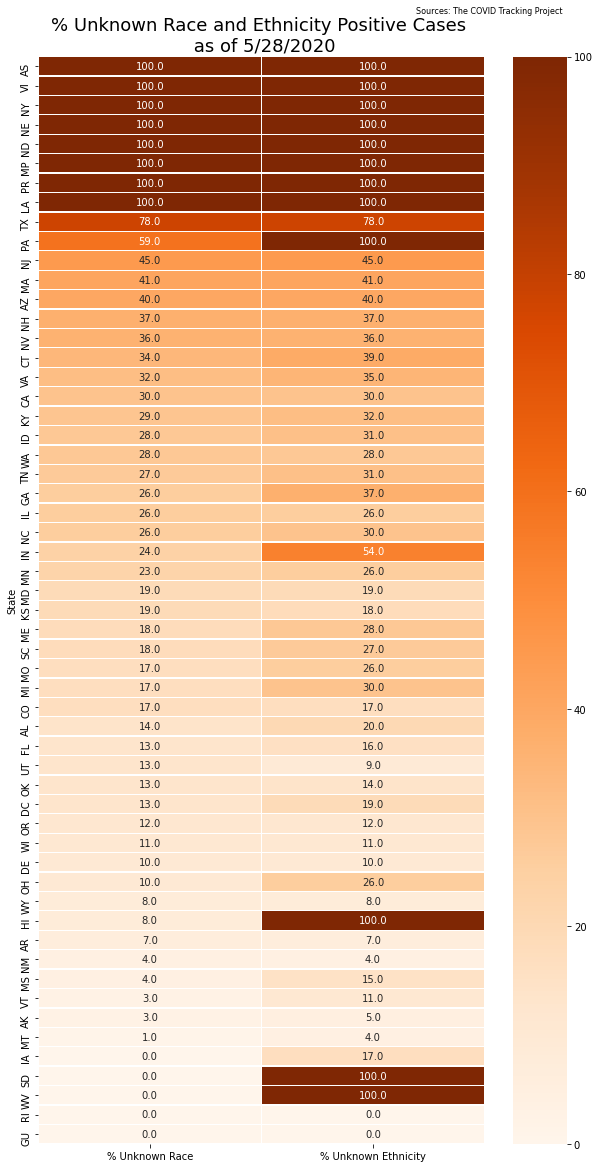

In [6]:
fig, ax = plt.subplots(figsize=(10,20))
title = "% Unknown Race and Ethnicity Positive Cases \n as of 5/28/2020"

plt.title(title, fontsize=18)

sns.heatmap(positive_unknown_state, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/%UnknownPositiveCases")

plt.show()

In [21]:
positive_unknown_states = positive_df.copy()
positive_unknown_states = positive_unknown_states.drop(["State", "Update Time (Et)", "% Unk."], axis = 1)
positive_unknown_states.fillna(0, inplace = True)

for column in positive_unknown_states.columns:
    positive_unknown_states[column] = positive_unknown_states[column].astype('float')

new_col = ['Total',
 'Known White ',
 'Known Black ',
 'Known LatinX / Hispanic',
 'Known Asian',
 'Known AIAN',
 'Known NHPI',
 'Known Multiracial ',
 'Other',
 'Unknown Race',
 'Known Hispanic',
 'Known Non-Hispanic',
 'Unknown Ethnicity']

positive_unknown_states.columns = new_col

positive_unknown_us = pd.DataFrame(positive_unknown_states.sum()).T

positive_unknown_us ["ID"] = ["# Known Positive"]
cols = list(positive_unknown_us.columns.values)
cols = cols[-1:] + cols[:-1]
positive_unknown_us = positive_unknown_us[cols]

positive_unknown_us = positive_unknown_us.append({"ID": "% Known Positive"}, ignore_index = True)
positive_unknown_us = positive_unknown_us.append({"ID": "# US"}, ignore_index = True)
positive_unknown_us = positive_unknown_us.append({"ID": "% US"}, ignore_index = True)
positive_unknown_us

,ID,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown Race,Known Hispanic,Known Non-Hispanic,Unknown Ethnicity
0,# Known Positive,1690064.0,355939.0,198672.0,197064.0,32259.0,9974.0,2342.0,8509.0,73140.0,810068.0,261901.0,539699.0,388379.0
1,% Known Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,% US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for column in positive_unknown_us.columns:
    if column != "ID":
        value = (positive_unknown_us[column]/positive_unknown_us['Total']).values[0]
        positive_unknown_us.loc[[1], column] = value*100
        
positive_unknown_us

,ID,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown Race,Known Hispanic,Known Non-Hispanic,Unknown Ethnicity
0,# Known Positive,1690064.0,355939.000000,198672.000000,197064.00000,32259.000000,9974.000000,2342.000000,8509.000000,73140.000000,810068.000000,261901.000000,539699.000000,388379.000000
1,% Known Positive,100.0,21.060682,11.755294,11.66015,1.908744,0.590155,0.138575,0.503472,4.327647,47.931203,15.496514,31.933643,22.980136
2,# US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,% US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# why is LatinX as a race and also ethnicity?

# https://www.census.gov/quickfacts/fact/table/US/PST045219
US_pop = 328239523

# white alone, percent (it is not non-hispanic whites)
US_white = .765
US_black = .134
US_LatinX = 0
US_AIAN = .013
US_asian = .059
US_NHPI = .002
US_Multiracial = .027 
US_Hispanic = .173
US_NonHispanic =1 - US_Hispanic
US_LatinX = US_Hispanic

race_array = [1, US_white, US_black, US_LatinX, US_asian, US_AIAN, US_NHPI, US_Multiracial, np.nan, np.nan, US_Hispanic, US_NonHispanic, np.nan]

i = 0
for column in positive_unknown_us.columns:
    if column != "ID":
        positive_unknown_us.loc[[2], column] = race_array[i]*US_pop
        positive_unknown_us.loc[[3], column] = race_array[i]*100
        
        i = i+1
positive_unknown_us

,ID,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown Race,Known Hispanic,Known Non-Hispanic,Unknown Ethnicity
0,# Known Positive,1690064.0,3.559390e+05,1.986720e+05,1.970640e+05,3.225900e+04,9.974000e+03,2342.000000,8.509000e+03,73140.000000,810068.000000,2.619010e+05,5.396990e+05,388379.000000
1,% Known Positive,100.0,2.106068e+01,1.175529e+01,1.166015e+01,1.908744e+00,5.901552e-01,0.138575,5.034721e-01,4.327647,47.931203,1.549651e+01,3.193364e+01,22.980136
2,# US,328239523.0,2.511032e+08,4.398410e+07,5.678544e+07,1.936613e+07,4.267114e+06,656479.046000,8.862467e+06,NaN,NaN,5.678544e+07,2.714541e+08,NaN
3,% US,100.0,7.650000e+01,1.340000e+01,1.730000e+01,5.900000e+00,1.300000e+00,0.200000,2.700000e+00,NaN,NaN,1.730000e+01,8.270000e+01,NaN


In [27]:
positive_unknown_us_T = positive_unknown_us.copy()
positive_unknown_us_T = positive_unknown_us_T.T.rename_axis('ID').reset_index()

positive_unknown_us_T.columns = positive_unknown_us_T.iloc[0]
positive_unknown_us_T = positive_unknown_us_T.drop([0]).set_index("ID")
# positive_unknown_us_T = positive_unknown_us_T[["ID","% Known Positive", "% US"]]
positive_unknown_us_T = positive_unknown_us_T.drop(["Total"])

positive_unknown_us_T["Difference %"] = positive_unknown_us_T["% US"]- positive_unknown_us_T["% Known Positive"]
positive_unknown_us_T["Affected per 100000"] = positive_unknown_us_T["# Known Positive"]/positive_unknown_us_T["# US"]*100000

positive_unknown_us_T_percap = positive_unknown_us_T[['# Known Positive', '# US', 'Affected per 100000']]
positive_unknown_us_T_percap = positive_unknown_us_T_percap.sort_values("Affected per 100000", ascending = False)

positive_unknown_us_T_rep = positive_unknown_us_T[['% Known Positive','% US','Difference %']]
positive_unknown_us_T_rep = positive_unknown_us_T_rep.sort_values("Difference %", ascending = False)

In [32]:
positive_unknown_us_T_percap

,# Known Positive,# US,Affected per 100000
ID,,,
Known Hispanic,261901,5.67854e+07,461.212
Known Black,198672,4.39841e+07,451.691
Known NHPI,2342,656479,356.752
Known LatinX / Hispanic,197064,5.67854e+07,347.033
Known AIAN,9974,4.26711e+06,233.741
Known Non-Hispanic,539699,2.71454e+08,198.818
Known Asian,32259,1.93661e+07,166.574
Known White,355939,2.51103e+08,141.75
Known Multiracial,8509,8.86247e+06,96.0116


In [33]:
positive_unknown_us_T_rep

,% Known Positive,% US,Difference %
ID,,,
Known White,21.0607,76.5,55.4393
Known Non-Hispanic,31.9336,82.7,50.7664
Known LatinX / Hispanic,11.6602,17.3,5.63985
Known Asian,1.90874,5.9,3.99126
Known Multiracial,0.503472,2.7,2.19653
Known Hispanic,15.4965,17.3,1.80349
Known Black,11.7553,13.4,1.64471
Known AIAN,0.590155,1.3,0.709845
Known NHPI,0.138575,0.2,0.0614254


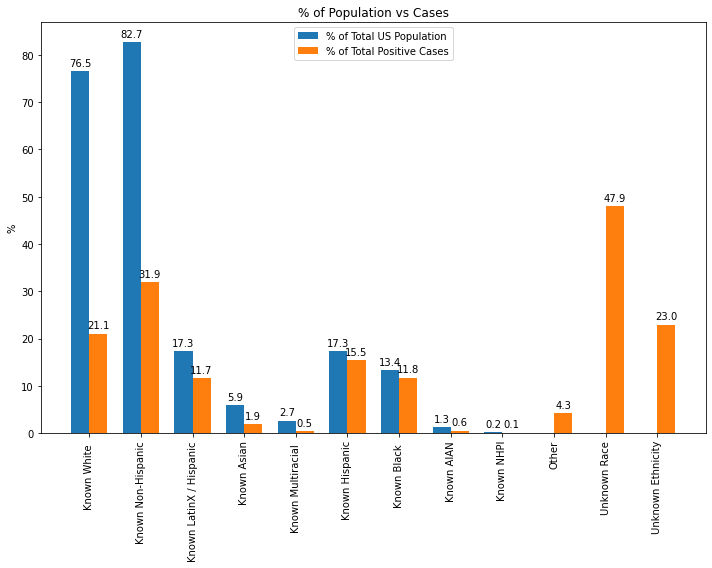

In [62]:
percent_chart = positive_unknown_us_T.sort_values("Difference %", ascending = False).reset_index()
percent_chart

labels = percent_chart["ID"]
us = percent_chart["% US"]
positives = percent_chart["% Known Positive"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, us, width, label='% of Total US Population')
rects2 = ax.bar(x + width/2, positives, width, label='% of Total Positive Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Population vs Cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("images/%PopulationvsCases")

plt.show()

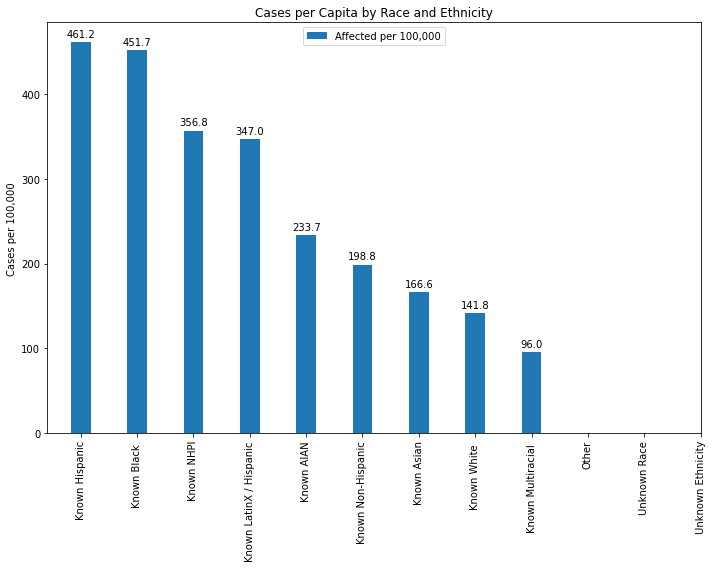

In [67]:
percap_chart = positive_unknown_us_T.sort_values("Affected per 100000", ascending = False).reset_index()

labels = percap_chart["ID"]
affected = percap_chart["Affected per 100000"]

x = np.arange(len(labels))  # the label locations


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, affected, width, label='Affected per 100,000')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases per 100,000')
ax.set_title('Cases per Capita by Race and Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.savefig("images/AffectedperCapita")

plt.show()